In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported")

✅ Libraries imported


/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Load Model and Data

In [2]:
# Load saved model and data
model = joblib.load('../models/trajectory_model.joblib')
df = pd.read_csv('../data/trajectory_excellent.csv')

# Prepare features (same as training)
drop_cols = ['UNITID', 'Institution_Name', 'Year', 'Target_Trajectory', 'Target_Label', 'State']
X = df.drop(columns=drop_cols)

print(f"✅ Loaded model and data: {X.shape[0]} samples, {X.shape[1]} features")

✅ Loaded model and data: 10332 samples, 46 features


## 2. Compute SHAP Values

In [3]:
# Sample for SHAP computation (500 samples for speed)
X_sample = X.sample(n=500, random_state=42)

# Transform through pipeline preprocessor
X_transformed = model.named_steps['preprocessor'].transform(X_sample)
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Extract XGBoost classifier and compute SHAP
xgb_model = model.named_steps['classifier']
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_transformed)

print(f"✅ SHAP values computed: {np.array(shap_values).shape}")

✅ SHAP values computed: (500, 50, 3)


## 3. Generate and Save Summary Plot

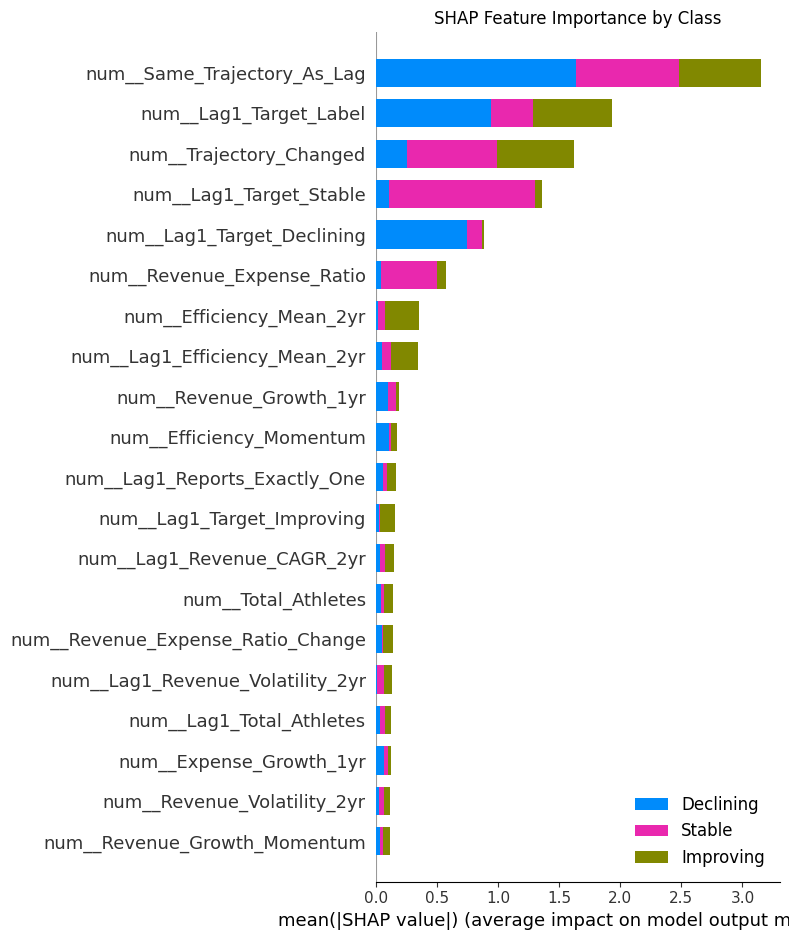

✅ Saved: ../figures/shap_summary.png


In [4]:
# Generate and save summary bar plot
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values, 
    X_transformed, 
    feature_names=feature_names,
    class_names=['Declining', 'Stable', 'Improving'],
    plot_type="bar",
    show=False
)
plt.title('SHAP Feature Importance by Class')
plt.tight_layout()
plt.savefig('../figures/shap_summary.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: ../figures/shap_summary.png")

## Summary

SHAP analysis provides model interpretability by showing:
- Which features have the highest impact on predictions
- How each feature contributes across all three trajectory classes (Declining, Stable, Improving)
- The relative importance aligns with domain knowledge (efficiency metrics, temporal features)